<h1>Artifical Intelligence Implemantation With Iris Dataset</h1>

First of all, we are going to manipulate our dataset and include our libraries in order to examine and eliminate existing problems. Then we will read the dataset.

In [1]:
import pandas

df = pandas.read_csv('iris.csv')

After we read  our dataset, we can begin to search information about our data. Firstly, I'm going to apply a method which I use a lot, a method I like to call the _first look at the data_. We will take a look at the first or the last 5 items of the dataset and by doing this, we will have a general idea of the dataset.

In [2]:
df.head()
#df.tail() similarly, this will show the last 5 item
#if we set a parameter df.head(10) like this, we can see the first 10 item

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


__After we take a first look at the data, we can examine it in more detail. We will notice we have a lot of methods and pandas functions that we can apply, however we will not be using them all.__

In [3]:
df.describe() #used to acquire statistical information about the data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
df.info() #the info function shows the type of the feature and non-null line information for every feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


In [5]:
df.shape #(row number, column number)
#df.shape[0] for rows
#df.shape[1] for columns

(150, 6)

As I mentioned before, there are a lot of data manipulation and functions which serve to examine the data, but these are the ones we will use. With what we've done until now, _we have learned that we have an unnecessary feature (the ID column). The ID feature might pose a problem for the machine learning model that we will train_, because the ID feature is not an important information for our model. Also, pandas.DataFrame provides us with an index similar to the ID column, this is why we need to clean our dataset, meaning we need to delete the ID column from our DataFrame.

In [6]:
df = df.drop("Id",axis=1) #the reason we write axis = 1 is because we want to delete the column

Now, we eliminated all the existing problems in the data, and we have some kind of information about our data. Now we can begin to visualize the data and start to analyze the graphics. There are a lot of libraries we can use for visualization. For variety's sake, I will use a couple of very important and commonly used libraries for visualization.

In [7]:
import seaborn 
#https://seaborn.pydata.org

<h3>Convenience Provided By The Seaborn Library</h3>

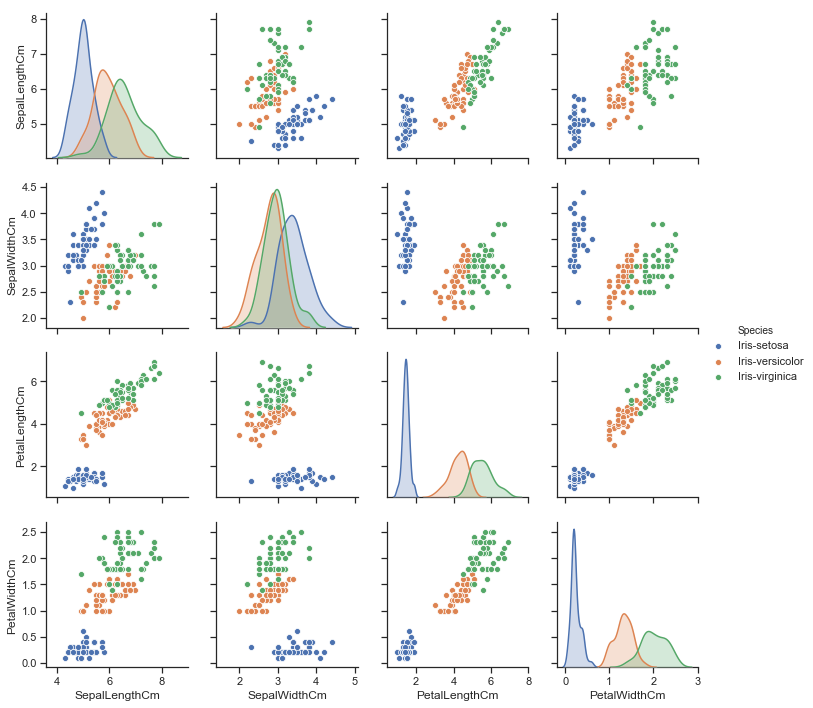

In [8]:
seaborn.set(style = "ticks")

seaborn.pairplot(df,hue="Species")

If we analyze the graphics we will notice that all of our features are compared with each other. We can analyze every species of Iris, using the same graphic. We don't need to draw all of the subplots separately and merge them, Seaborn does this for us.

<h3>Visualization with Plotly Library</h3>

Since we are trying to use the library offline, it won't work unless we run the cell. That's why, when I share the graphic you may not be able to see it on github.com. However, if you'd like to try, as long as you have the necessary libraries, you will see a grouped-bar graphic which creates 4 bars for each species when you write the source code. Also, if you'd like to see the graphic online, you can click the link below. <br>

[Graphic Link](https://i.hizliresim.com/8a8Y17.png)

In [9]:
import plotly
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


init_notebook_mode(connected=True)

import plotly.graph_objs as go

#now we will plot a bar graphic for every feature

pl_bar = go.Bar(x= df.Species ,y = df.PetalLengthCm,name= 'Petal Length Cm')
pw_bar = go.Bar(x = df.Species ,y = df.PetalWidthCm,name = 'Petal Width Cm')
sl_bar = go.Bar(x = df.Species ,y =df.SepalLengthCm,name = 'Sepal Length Cm')
sw_bar = go.Bar(x = df.Species , y=df.SepalWidthCm , name = 'Sepal Width Cm')

data = [pl_bar,pw_bar,sl_bar ,sw_bar]
layout = go.Layout(barmode = 'group')

fig = go.Figure(data = data ,layout = layout)
iplot(fig,filename='grouped-bar')


#we showed the offline usage of the Plotly Library. this library has many different graphics. 
#the documantation I used is a plotlyin original documantation
#www.plot.ly/python

<h1>Creating A Machine Learning Model</h1>

Now, we can talk about the machine learning model that we are going to create. We acquired information about our data, we made the visualization and examined the graphics we visualized. Now we can make precise decisions about our model. We will train our model with the method _Supervised Learning_. We have labels in our dataset, these are iris-setosa, iris-versicolor and iris-virginica. That is why we will use the _Supervised Learning_ method. <br>

Then, while we apply the _Supervised Learning_ method, we need to determine if our problem is a classification or a regression problem. It is clear that our problem here is a classification problem, because or dataset is separated into 3 species which are as I mentioned, iris-setosa, iris-versicolor and iris-virginica. <br>

Now that we have all the information we need about the problem, we can start to create our model. However, we have another question at hand. Which machine learning algorithm are we going to use? It can be wrong to say something for sure at this stage. In order to create the model with the highest rate of success, we will train the model with a couple of different algorithms and see which algorithm has better results by comparing the models. Then, we will focus on the algorithm with the best result. <br>

<font color='orange'>___*If you are not a beginner, I advise you to research all of the machine learning algorithms I give below in more detail since I explained them for beginners.___</font> 

<h2>Logistic Regression</h2>

Because of the title, you may say _"Weren't we solving a classification problem, why are we using a regression algortihm?"_, but the thing is logistic regression algorithm is used for classification.

<h3>Binary Logistic Regression</h3>

This is an algorithm which provides binary classification with the outputs 0 and 1. For example, it is used to classify an e-mail as spam or not, or an equation as correct or incorrect. <br>

The reason why it is a regression is because it may not always give specific outputs like 0 and 1.

<h3>Multinomial Logistic Regression</h3>

This is a _Logistic Regression_ method used to classify data which has 3 or more categories. <br>

Now, we have enough information to create our model with the logistic regression algorithm.

In [10]:
#for machine learning algorithms, we will use Google's Scikit-Learn Library
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

train_X,test_X,train_y,test_y = train_test_split(df.drop("Species",axis=1),df.Species,test_size = 0.2)
#we split the data in rates of 0.8 education and 0.2 testing data
#x is numeric data, y is label
#for further information, use Scikit-Learn original documentation

In [11]:
base_iris_logistic = LogisticRegression()

base_iris_logistic.fit(train_X,train_y)

C:\Users\FX505\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\FX505\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [12]:
base_model_predicts = base_iris_logistic.predict(test_X)
print('Accuracy from base model train data : {0}'.format(base_iris_logistic.score(train_X,train_y)))
print('Accuracy from base model test data: {0}'.format(base_iris_logistic.score(test_X,test_y)))

Accuracy from base model train data : 0.975
Accuracy from base model test data: 0.9333333333333333


In [13]:
custom_iris_logistic = LogisticRegression(multi_class='multinomial',solver = 'newton-cg')

custom_iris_logistic.fit(train_X,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [14]:
custom_model_predicts = custom_iris_logistic.predict(test_X)
print('Accuracy from custom model train data : {0}'.format(custom_iris_logistic.score(train_X,train_y)))
print('Accuracy from custom model test data : {0}'.format(custom_iris_logistic.score(test_X,test_y)))

Accuracy from custom model train data : 0.9833333333333333
Accuracy from custom model test data : 0.9333333333333333


In [15]:
#calculating the accuracy rate of our model in percentage

base_model_accuracy = base_iris_logistic.score(test_X,test_y)*100
custom_model_accuracy = custom_iris_logistic.score(test_X,test_y)*100

Now that we know the accuracy rate of our model, we can compare these rates in a graphic. We are going to do this by using a different graphic library from what we've used before.

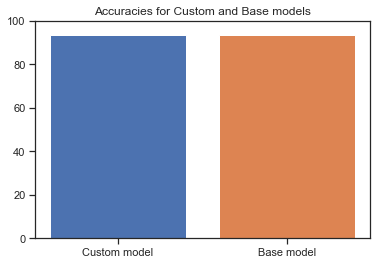

In [16]:
import matplotlib.pyplot as plt

plt.bar("Custom model",custom_model_accuracy)
plt.bar("Base model",base_model_accuracy)
plt.yticks([0,20,40,60,80,100])
plt.title('Accuracies for Custom and Base models')
plt.show()

We trained our model by using default linear regression algorithm and we trained it by default and by custom paremeters. We saw which one gave a better result for testing data. Although it is the customized parameter that gave the best result for me, the accuracy rate can change depending on the training and testing data.

<h2>KNN (K-Nearest Neighbor)</h2>

KNN is also a classification algorithm and is suitable to our problem. How it functions is it finds as much neighbors as the number K (specifically chosen number) which is the closest number that is predicted according to our dataset. It makes a decision depending on which classes the neighbors are and finds an answer. <br>

To find neighbors, euclidian distance can be used.

In [17]:
from sklearn.neighbors import KNeighborsClassifier
#we can create our model after we include our library

iris_knn = KNeighborsClassifier(n_neighbors = 3) #K is the number of neighbors

iris_knn.fit(train_X,train_y) #we trained our model accordingly to our training data

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In KNN algorithm neighbor number is important for the accuracy of our model. If the neighbor number is not enough, the model will be less trustable. If the neighbor number is too much, the model will suffer overfitting and similarly, this situation causes faulty decisions of the model. Also, this will lead to time complexity, meaning it will take too much time for the model to respond. I won't be training the model twice with the same algorithm like I did with the logistic regression algorithm, however a better accuracy rate can be achieved by changing the neighbor number.

In [18]:
knn_test_values = iris_knn.predict(test_X) #we use variables for the predicted KNN values
#we will compare these values with the labels of our testing data, meaning the real correct results 
#and we will see our success rate
true_predicts = 0
import numpy
testy = numpy.array(test_y)
for i in range(len(test_y)):
    if(testy[i] == knn_test_values[i]):
        true_predicts += 1


print("Test Variables Size : ",len(testy))
#now, let's calculate the succes rate in percentage
#total testing data number is 30

knn_accuracy = 100*true_predicts/len(testy)
print("KNN Accuracy for irisdataset : %",knn_accuracy)

Test Variables Size :  30
KNN Accuracy for irisdataset : % 90.0


Now, we have accuracy rates of both the logictic regression and the KNN. Let's make another graphic in order to see all three of them together.

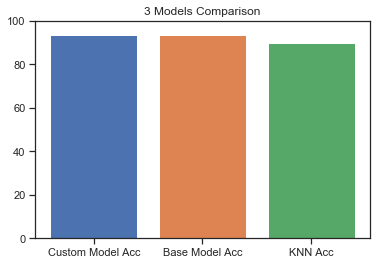

In [19]:
plt.bar("Custom Model Acc",custom_model_accuracy)
plt.bar("Base Model Acc",base_model_accuracy)
plt.bar("KNN Acc",knn_accuracy)
plt.yticks([0,20,40,60,80,100]) #Y ekseninde gormek istedigimiz rakamlar
plt.title("3 Models Comparison")

plt.show()

<h2>Naive Bayes Classifier</h2>

Naive Bayes classification algorithm calculates possibility rates for every given situation and chooses as an output the class with the highes possibilty rate. For detailed information, Bayes' theorem and the mathematical modeling should be examined. <br>

It can be examined in 3 different ways. <br>

__Gaussian: This is used for general classification and it assumes that features follow a normal distribution.__ <br>

__Multinomial: It is used for discrete variables.__ <br>

__Bernoulli: It is used for binomial problems, like 0 and 1, or like an e-mail is a spam or it is not.__ <br>

What we will use for the Iris dataset is the Gaussion model.

In [20]:
from sklearn.naive_bayes import GaussianNB #we import the model as usual

iris_gaussian = GaussianNB() #we created our model
iris_gaussian.fit(train_X,train_y) #we are training our model

GaussianNB(priors=None, var_smoothing=1e-09)

In [21]:
gaussian_predicts = iris_gaussian.predict(test_X)
#we keep the forecast in the variable named gaussian_predicts
#we can use the method we applied before for the calculation
true_predict = 0
for i in range(len(testy)):
    if(testy[i] == gaussian_predicts[i]):
        true_predict += 1
        
print('GaussianNB number of true predicts : ',true_predict)
print('Our implementation GaussianNB Accuracy for iris dataset : %',true_predict*100/len(testy))

#or another option sklearn provides us
from sklearn.metrics import accuracy_score
gaussian_accuracy = accuracy_score(testy,gaussian_predicts)
print('Sklearns accuracy function GaussianNB Accuracy for iris dataset : %',gaussian_accuracy*100)
gaussian_accuracy = gaussian_accuracy*100

GaussianNB number of true predicts :  27
Our implementation GaussianNB Accuracy for iris dataset : % 90.0
Sklearns accuracy function GaussianNB Accuracy for iris dataset : % 90.0


Now we have another model and its accuracy rate. We can add this model to the graphic where we compare models.

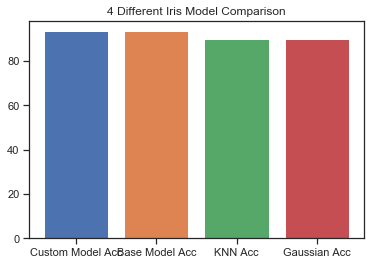

In [22]:
plt.bar('Custom Model Acc',custom_model_accuracy)
plt.bar('Base Model Acc',base_model_accuracy)
plt.bar('KNN Acc',knn_accuracy)
plt.bar('Gaussian Acc',gaussian_accuracy)
plt.title('4 Different Iris Model Comparison')
plt.show()

<h2>SVM (Support Vector Machine)</h2>

SVM is an machine learning algorithm which segregates the classes (features) with a hyper-plane. <br>

Sample: If we are dealing with a two-dimensional (feature) space, then we have two classes. In this case, the hyper-plane will become a line that segregates the two classes. It is explained with the image below (classes: red star, blue square). <br>

![graph](svmgraph.png)

In [26]:
from sklearn import svm

iris_svm = svm.SVC()
iris_svm.fit(train_X,train_y)

C:\Users\FX505\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Now, I want to talk about certain parameteres that we can use to create a customized model with the SVM algorithm. With the kernel parameter we can decide if the hyper-plane should be linear, polinomial, etc., meaning we can decide the structure of our hyper-plane. <br>

C and gamma parameters are also very useful to us. There are graphics wich compare these two parameters, if you'd like, you can also compare them yourselves.

In [28]:
svm_predict = iris_svm.predict(test_X)

svm_accuracy = accuracy_score(testy,svm_predict)
svm_accuracy = svm_accuracy*100
print("SVM Accuracy for iris dataset : %",svm_accuracy)

SVM Accuracy for iris dataset : % 93.33333333333333


Now, we will compare our models with a graphic again.

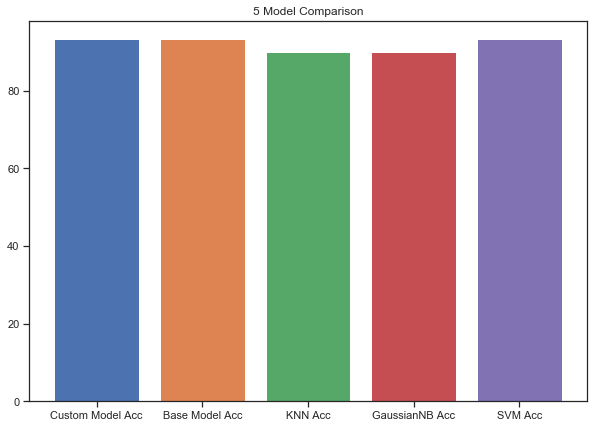

In [29]:
plt.figure(figsize =(10,7))
plt.bar('Custom Model Acc',custom_model_accuracy)
plt.bar('Base Model Acc',base_model_accuracy)
plt.bar('KNN Acc',knn_accuracy)
plt.bar('GaussianNB Acc',gaussian_accuracy)
plt.bar('SVM Acc',svm_accuracy)
plt.title("5 Model Comparison")


plt.show()

<h2>Decision Tree Classifier</h2>

Decision Tree Classifier divides the data items into groups. These groups should have same class labels, therefore the working plot is repetitively divided into sub parts until purity is achieved. <br>

Main objective is to learn the simple decision rules that are acquired from the data features and to predict the target variable's value.

In [30]:
from sklearn.tree import DecisionTreeClassifier
iris_decisiontree = DecisionTreeClassifier(criterion = 'entropy')

iris_decisiontree.fit(train_X,train_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [31]:
predictions_tree = iris_decisiontree.predict(train_X)
trainy = numpy.array(train_y)
predictions_tree = accuracy_score(trainy,predictions_tree)*100
print('Decision Tree Accuracy for iris dataset for train data : %',predictions_tree)
predictions_tree = iris_decisiontree.predict(test_X)
predictions_tree = accuracy_score(testy,predictions_tree)*100
print('Decision Tree Accuracy for iris dataset for test data : %',predictions_tree)

Decision Tree Accuracy for iris dataset for train data : % 100.0
Decision Tree Accuracy for iris dataset for test data : % 90.0


<h2>Random Forest Classifier</h2>

Random Forest Classifier creates a random forest by merging the decision trees in order to achieve a more accurate and stabilized model.

In [33]:
from sklearn.ensemble import RandomForestClassifier

iris_randomforest = RandomForestClassifier(n_estimators = 100) 
#with n _estimators parameter, we choose the number of decision trees we want to exist in the forest

iris_randomforest.fit(train_X,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [34]:
randomforest_accuracy = iris_randomforest.score(test_X,test_y)*100
print('Random Forest Accuracy for iris dataset on test data : %',randomforest_accuracy)
print('Random Forest Accuracy for iris dataset on train data : %',iris_randomforest.score(train_X,train_y)*100)

Random Forest Accuracy for iris dataset on test data : % 90.0
Random Forest Accuracy for iris dataset on train data : % 100.0


<h3>Now we can see all of our models in the same graphic and see which model has the highest accuracy rate</h3>

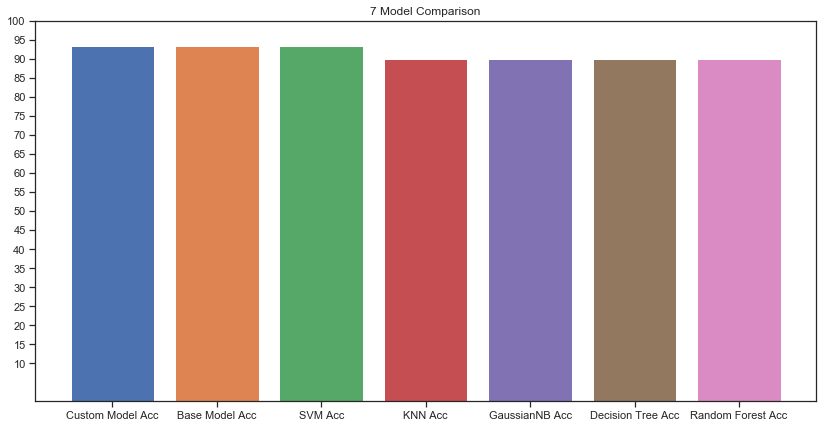

In [44]:
plt.figure(figsize =(14,7))
plt.bar('Custom Model Acc',custom_model_accuracy)
plt.bar('Base Model Acc',base_model_accuracy)
plt.bar('SVM Acc',svm_accuracy)
plt.bar('KNN Acc',knn_accuracy)
plt.bar('GaussianNB Acc',gaussian_accuracy)
plt.bar('Decision Tree Acc',predictions_tree)
plt.bar('Random Forest Acc',randomforest_accuracy)
plt.yticks([i for i in range(10,105,5)])
plt.title("7 Model Comparison")

plt.show()

The accuracy of our logistic regression models and SVM model are the same, but we will focus on the SVM model. We will customize the dataset, we will create a new model with SVM algorithm. Then we will train the new model with the customized dataset.

In [45]:
print(df.describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


We are going to multiply SepalLenghtCm and SepalWidthCm, and create Sepal as a column. Then, we will multiply PetalLenghtCm with PetalWidhtCm, and create Petal as a column. After that, we will train our model again.

In [47]:
sepal = df.SepalLengthCm*df.SepalWidthCm
petal = df.PetalLengthCm*df.PetalWidthCm


dfnew =pandas.DataFrame( {'Sepal':sepal,'Petal':petal,'Species':df.Species})

In [48]:
xtrain,xtest,ytrain,ytest = train_test_split(dfnew.drop("Species",axis=1),dfnew.Species,test_size = 0.1)

In [49]:
newmodel = svm.SVC()
newmodel.fit(xtrain,ytrain)

C:\Users\FX505\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [50]:
predicts = newmodel.predict(xtest)
print('Our freestyle new models accuracy for test sets: %',accuracy_score(newmodel.predict(xtest),ytest)*100)

Our freestyle new models accuracy for test sets: % 93.33333333333333


Now we know our customized model's accuracy rate. We are going to create a graphic which shows our model's answers and the correct answers. In this graphic, the predictions (dots) which are not on the lines are wrong.

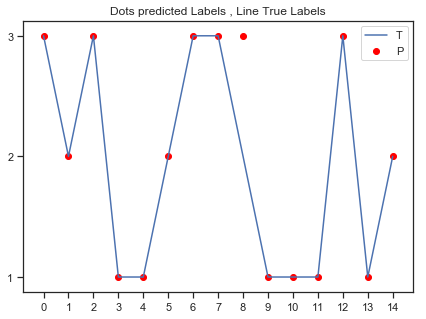

In [63]:
predict = []
ytest = numpy.array(ytest)
numeric = []
for i in ytest:
    if i == 'Iris-setosa':
        numeric.append(1)
    elif i=='Iris-versicolor':
        numeric.append(2)
    elif i=='Iris-virginica':
        numeric.append(3)
        
xnumbers = [i for i in range(len(ytest))]

for i in predicts:
    if i == 'Iris-setosa':
        predict.append(1)
    elif i=='Iris-versicolor':
        predict.append(2)
    elif i=='Iris-virginica':
        predict.append(3)
        

plt.figure(figsize=(7,5))

plt.title("Dots predicted Labels , Line True Labels")
plt.plot(numeric)
plt.scatter(xnumbers,predict,color = 'red')
plt.xticks([i for i in range(len(xnumbers))])
plt.yticks([1,2,3])
plt.legend("TP")

plt.show()

As you can see, the 8th prediction is wrong. The true label is 2 (iris-versicolor), but our model predicted 3 (iris-virginica). We don't have any other wrong prediction.

<h1>Conclusion</h1>

We've created 6 different machine learning models with the classification method. Iris dataset does not have a lot of data and is not very complex, this helped us achieve good results even without a detailed model. In Iris dataset, SVM model proved itself to be the most efficient. Then, we decided to create a new model with new features to see the efficiency of a new customized model. <br>

I advise to research _Supervised Learning_ more in depht. We only mentioned the _classification method_ here, but there is also the _regression method_ which I believe should be learned. <br>

___Thank you for checking out my tutorial. :)___

<h1>References</h1>

[SVM Hyperplane Example](https://www.google.com/search?biw=1536&bih=728&tbm=isch&sa=1&ei=jCs7XOzDPMKmsgHrxY1Q&q=svm+hyperplane+line&oq=svm+hyperplane+line&gs_l=img.3...58886.62261..62520...1.0..0.203.2015.0j11j2......1....1..gws-wiz-img.......35i39j0j0i30j0i19j0i8i30i19.z-MzU-_G3y8#imgrc=eW0gIHHLvC6VqM:)
<br>
[Plotly Visulization Library](https://plot.ly) <br>
[Seaborn Visulization Library](https://seaborn.pydata.org) <br>
[Matplotlib Visulization Library](https://matplotlib.org) <br>
[For Machine Learning Algorithms(sklearn)](https://scikit-learn.org) <br>
[For Detailed Informations(medium)](https://www.medium.com) <br>
[For Detailed Informations(towardsdatascience)](https://www.towardsdatascience.com) <br>
[For Detailed Informations(Analyticsvidhya)](https://www.analyticsvidhya.com)